# TD de machine Learning : Catégorisation musicale

**Elective** : Machine Learning   
**Professeur** : Théophile Ravillion   
**Date** : Vendredi 23 Avril 2021

## Contexte 
Vous travaillez chez Deezer, département Data Science, félicitations.
D'habiles ingénieurs musicologues ont mis au point un jeu de données contenant des informations sur des morceaux de musique. 
Avec quelques transformées de Fourier et autres joyeusetés propres à leur art, ils ont mis au point deux jeux de données contenant de nombreux indicateurs décrivant un morceau de musique.
Ils comptent sur vous pour mettre au point un algorithme capable d'identifier le genre musical d'un morceau sur la base des différents indicateurs qu'ils ont mis au point.
Vous vous apprétiez à leur demander des informations concernant ces variables mais vous constatez qu'ils sont partis en séminaire d'entreprise et que vous vous retrouvez tout seul avec un jeu d'entrainement étiqueté, un jeu de test et un post-it goguenard de votre chef qui vous demande de faire des prédictions précises sur le jeu de test d'ici 16h.

## Votre défi :
Modéliser le problème, construire un modèle et faire une prédiction de la catégorie à laquelle appartient chaque élément du fichier test.csv à l'aide d'un modèle aussi simple et performant que possible.


## Livrable
Un projet github contenant un notebook + un fichier prédictions.csv contenant les prédictions faites sur le jeu de test

En header le nom des colonnes (music_id et prediction) et pour chacun des morceaux la catégorie prédite.
Merci d'utiliser la virgule comme séparateur 

Bonne chance !

# Feuille de route

Comment procéder ? 
Pour réaliser cet exercice, il vous faudra :

## Récuperer les données 

In [171]:
import pandas as pd
import numpy as np

url_train = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/train.csv"
url_test = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/test.csv"

df_train = pd.read_csv(url_train, sep=',', decimal='.' )
df_test = pd.read_csv(url_test, sep=',', decimal='.' )

## Analyser les données  
Identifier la distribution de chaque variable  
Données manquantes    
Données aberrantes   
Données corrélées entre elles  

### Boite à outils :   
**Décrire le contenu d'un dataframe pandas**   
`df.info()`   
`df.describe()`   

Gallerie Seaborn : https://seaborn.pydata.org/examples/index.html#   
Histograme : https://seaborn.pydata.org/generated/seaborn.histplot.html   
PairPlot : https://seaborn.pydata.org/generated/seaborn.pairplot.html   
Corrélogramme : https://seaborn.pydata.org/generated/seaborn.heatmap.html   

**Imputation des valeurs manquantes :**   
KNNImputer : https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html  
`df['chroma_0_mean'] = df['chroma_0_mean'].fillna(df['chroma_0_mean'].mean())`  
`df['chroma_0_mean'] = df['chroma_0_mean'].fillna(df['chroma_0_mean'].median())`  
`df['chroma_0_mean'] = df['chroma_0_mean'].fillna(df['chroma_0_mean'].mode())`  

**Quelques fonctions pandas utiles :**  
**Supprimer la ligne** i du dataframe df :   
`df.drop(i, axis=0, inplace=True)`
  
**Supprimer la colonne** c du dataframe df :   
`df.drop(i, axis=1, inplace=True)`
  
**Appliquer la fonction f** sur la colonne c du dataframe df :   
`df[c] = df[c].apply(lambda x : f(x))`

**Selectionner**  les 5 premiers éléments d'un dataframe df :   
`df.head(5)`

**Selectionner**  les 5 derniers éléments d'un dataframe df :   
`df.tail(5)`

**Selectionner**  les éléments d'un dataframe qui satisfont une condition :   
ex : selectionner toutes les lignes dont le prix est supérieur à 100 :  
`df[df['prix'] > 100]`

Nombre de features à disposition : 63 .

#################################################

Affichade des catégories à prédire : [1 3 0 2] .

#################################################

Afficahge des dimensions du jeu de train:

(320, 63) 

#################################################

Affichage des 5 premières lignes :

    music_id  chroma_0_mean  chroma_0_std  chroma_10_mean  chroma_10_std  \
0         0     866.507629   1585.437134      415.300842     710.790771   
1         1     832.956909   2140.568115      287.584564     281.795380   
2         2     331.544586    553.657532      260.467499     327.618225   
3         3     454.521851   1170.188110      601.021790    1035.021240   
4         4     180.331635    245.818512      388.924744     917.082581   

   chroma_11_mean  chroma_11_std  chroma_1_mean  chroma_1_std  chroma_2_mean  \
0      683.865845    1011.552856     473.484100    744.247925     304.914825   
1      405.467224     754.076904    1061.359863   226

<AxesSubplot:>

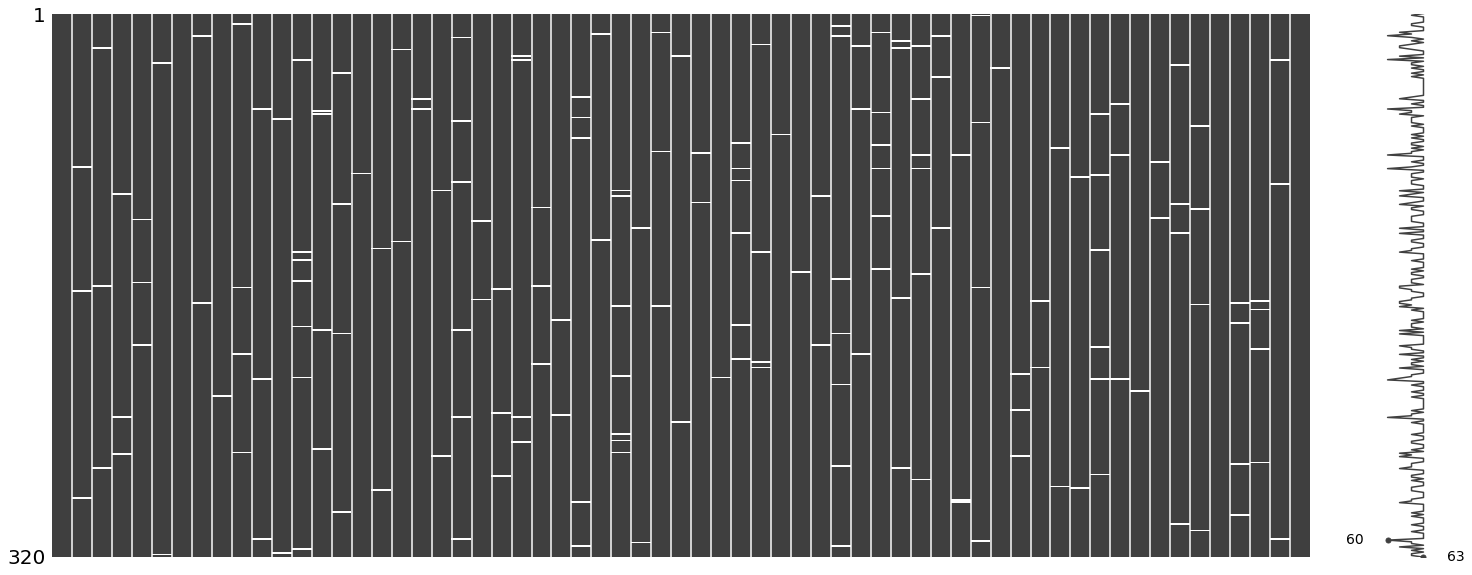

In [172]:
#!pip install missingno
import missingno as msno

print("Nombre de features à disposition :", len(df_train.columns), ".\n")
print("#################################################\n")
print("Affichade des catégories à prédire :", pd.unique(df_train['category']), ".\n")
print("#################################################\n")
print("Afficahge des dimensions du jeu de train:\n")
print(df_train.shape, "\n")
print("#################################################\n")
print("Affichage des 5 premières lignes :\n\n", df_train.head(), "\n")
print("#################################################\n")
print("Affichage des valeurs nulles:\n")
msno.matrix(df_train)

On remplit les valeurs nulles avec la mediane sur le jeu de train...

#################################################

On remplit les valeurs nulles avec la mediane sur le jeu de test...

#################################################

Affichage des valeurs nulles:



<AxesSubplot:>

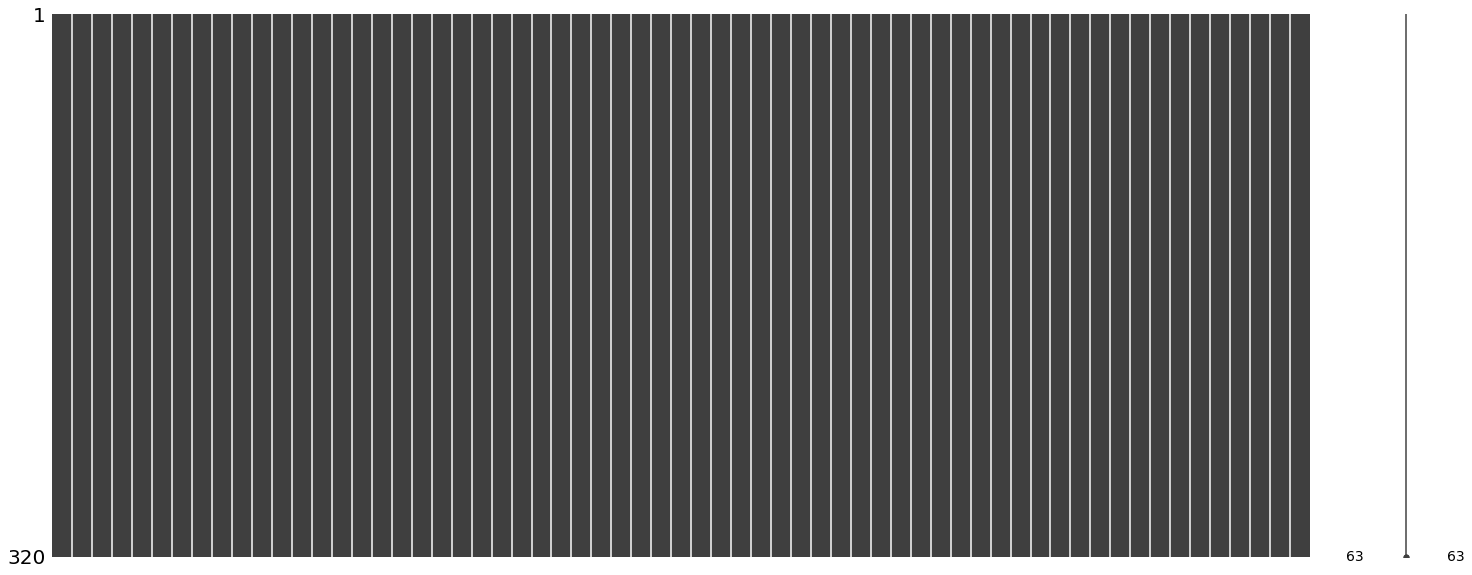

In [173]:
import numpy as np
    
print("On remplit les valeurs nulles avec la mediane sur le jeu de train...\n")
for col in df_train.columns:
    missing = df_train[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        med = df_train[col].median()
        df_train[col] = df_train[col].fillna(med)

print("#################################################\n")
        
print("On remplit les valeurs nulles avec la mediane sur le jeu de test...\n")
for col in df_test.columns:
    missing = df_test[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        med = df_test[col].median()
        df_test[col] = df_test[col].fillna(med)
        
print("#################################################\n")

print("Affichage des valeurs nulles:\n")
msno.matrix(df_train)


Les std et mean ont une très forte correlation, il semblerait que l'on puisse garder qu'une seule value entre std ou mean pour chaque feature.

On voit aussi une correlation forte entre tout les chromas, on pourrait en garder seulement un.

De la même manière : onset_rate, spectral_centroid_mean, spectral_decrease_mean, spectral_flux_mean, spectral_rolloff_mean, spectral_spread_mean, zcr_mean et zcr_std sont très corrélés, on pourrait en garder un seul


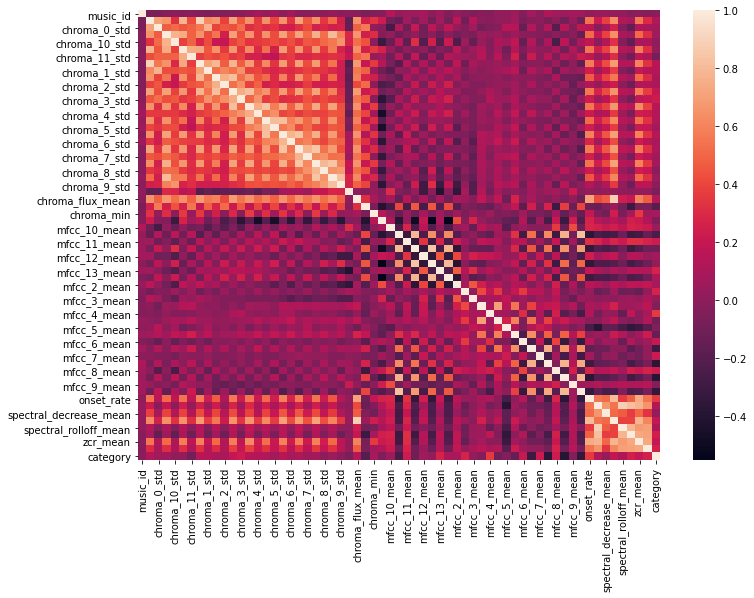

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
correlation_matrix = df_train.corr().round(2)
sns.heatmap(ax=ax, data=correlation_matrix)

print("\nLes std et mean ont une très forte correlation, il semblerait que l'on puisse garder qu'une seule value entre std ou mean pour chaque feature.")
print("\nOn voit aussi une correlation forte entre tout les chromas, on pourrait en garder seulement un.")
print("\nDe la même manière : onset_rate, spectral_centroid_mean, spectral_decrease_mean, spectral_flux_mean, spectral_rolloff_mean, spectral_spread_mean, zcr_mean et zcr_std sont très corrélés, on pourrait en garder un seul")

In [175]:
X = df_train[['music_id','chroma_0_mean', 'chroma_centroid_mean', 'chroma_flux_mean', 'chroma_max', 'chroma_min', 
              'chroma_spread_mean', 'mfcc_10_mean', 'mfcc_11_mean', 'mfcc_12_mean', 'mfcc_13_mean', 'mfcc_2_mean',
              'mfcc_3_mean', 'mfcc_4_mean', 'mfcc_5_mean', 'mfcc_6_mean', 'mfcc_7_mean', 'mfcc_8_mean', 'mfcc_9_mean', 
              'onset_rate', 'spectral_centroid_mean', 'spectral_decrease_mean', 'spectral_flux_mean', 'spectral_rolloff_mean',
              'spectral_spread_mean', 'zcr_mean']]
X = df_train.drop('category',axis=1)
Y = df_train['category']

print("Nombre de features à disposition :", len(X.columns), ".\n")

Nombre de features à disposition : 62 .



## Normaliser les données
Choisir une méthode de normalisation, comparer les résultats obtenus avec différentes méthodes 

### Boite à outils

K-NN : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html   
Robust Scaler : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html   
StandardScaler : 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler         
MinMaxScaler : 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler      

accuracy without scaler : 0.7075471698113207
accuracy for RobustScaler : 0.7830188679245284
accuracy for StandardScaler : 0.7358490566037735
accuracy for MinMaxScaler : 0.6981132075471698

On voit une meilleure précision après l'application d'un scaler. Après plusieurs itérations de cette cellule, Robust Scaler semble être la meilleure option.


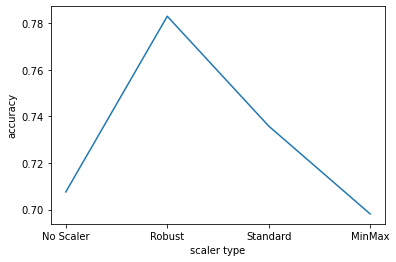

In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#################################################

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
print("accuracy without scaler :", accuracy_score(y_test, neigh.predict(X_test)))
accuracy_no_scaler = accuracy_score(y_test, neigh.predict(X_test))

#################################################

transformer = RobustScaler().fit(X)
X_train, X_test, y_train, y_test = train_test_split(transformer.transform(X), Y, test_size=0.33)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
print("accuracy for RobustScaler :", accuracy_score(y_test, neigh.predict(X_test)))
accuracy_robust_scaler = accuracy_score(y_test, neigh.predict(X_test))

#################################################

transformer = StandardScaler().fit(X)
X_train, X_test, y_train, y_test = train_test_split(transformer.transform(X), Y, test_size=0.33)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
print("accuracy for StandardScaler :", accuracy_score(y_test, neigh.predict(X_test)))
accuracy_standard_scaler = accuracy_score(y_test, neigh.predict(X_test))

#################################################

transformer = MinMaxScaler().fit(X)
X_train, X_test, y_train, y_test = train_test_split(transformer.transform(X), Y, test_size=0.33)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
print("accuracy for MinMaxScaler :", accuracy_score(y_test, neigh.predict(X_test)))
accuracy_min_max_scaler = accuracy_score(y_test, neigh.predict(X_test))

plt_x = ["No Scaler", "Robust", "Standard", "MinMax"]
plt_y = [accuracy_no_scaler, accuracy_robust_scaler, accuracy_standard_scaler, accuracy_min_max_scaler]
plt.plot(plt_x, plt_y)
plt.ylabel('accuracy')
plt.xlabel('scaler type')

print("\nOn voit une meilleure précision après l'application d'un scaler. Après plusieurs itérations de cette cellule, Robust Scaler semble être la meilleure option.")

## Etudier l’opportunité d’une réduction de dimension
- Tester les perfs obtenus pour différentes valeurs
- Visualiser la variance expliquée par chaque axe
- Justifier le nombre d’axes retenus

### Boite à outils  
Analyse en composante principale : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html   

la variance semble converger pour 3 composants.


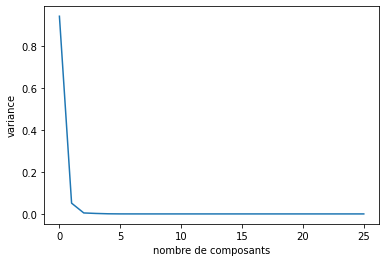

In [100]:
from sklearn.decomposition import PCA

pca = PCA(n_components=26)
pca.fit(X)
accuracy_26_components = pca.explained_variance_ratio_

plt.plot(accuracy_26_components)
plt.ylabel('variance')
plt.xlabel('nombre de composants')

print("la variance semble converger pour 3 composants.")

## Entrainer différents algorithmes de classification

`model = ...`   
`model.fit(X_train, y_train)`

### Boite à outils  
SVM : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html   
Random Forest : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier   
Regression logistique : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html   

RANDOM FOREST :
106 points, dont 30 mal classés
Accuracy score : 0.7169811320754716
F1 score : 0.7169811320754716

SVC :
106 points, dont 34 mal classés
Accuracy score : 0.6792452830188679
F1 score : 0.6792452830188679

LOGISTIC REGRESSION :
106 points, dont 30 mal classés
Accuracy score : 0.7169811320754716
F1 score : 0.7169811320754716


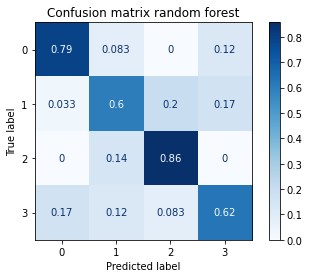

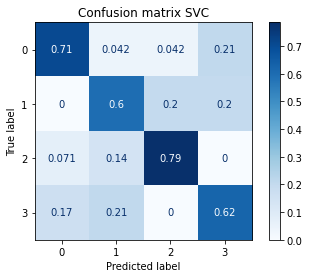

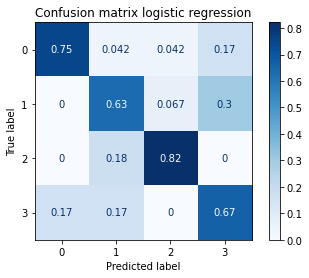

Random forest semble offrir les meilleurs résultats.


In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

clf = RandomForestClassifier(max_depth=20, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("RANDOM FOREST :")
print(str(X_test.shape[0]) + " points, dont " + str((y_test != y_pred).sum()) + ' mal classés')
print("Accuracy score :", accuracy_score(y_pred, y_test))
print("F1 score :", f1_score(y_pred, y_test, average='micro'))

##########################################################

svc = SVC()
y_pred = svc.fit(X_train, y_train).predict(X_test) 
print("\nSVC :")
print(str(X_test.shape[0]) + " points, dont " + str((y_test != y_pred).sum()) + ' mal classés')
print("Accuracy score :", accuracy_score(y_pred, y_test))
print("F1 score :", f1_score(y_pred, y_test, average='micro'))

##########################################################

reg = LogisticRegression(random_state=0)
y_pred = reg.fit(X_train, y_train).predict(X_test)
print("\nLOGISTIC REGRESSION :")
print(str(X_test.shape[0]) + " points, dont " + str((y_test != y_pred).sum()) + ' mal classés')
print("Accuracy score :", accuracy_score(y_pred, y_test))
print("F1 score :", f1_score(y_pred, y_test, average='micro'))


titles_options = [("Confusion matrix random forest", 'true', clf),
                  ("Confusion matrix SVC", 'true', svc),
                  ("Confusion matrix logistic regression", "true", reg)]

for title, normalize, classifier in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

print("Random forest semble offrir les meilleurs résultats.")

## Optimiser les hyper-paramètres de l’algorithme retenu
Tester différents hyper-paramètres pour tirer au mieux partit de l'algorithme retenu

### Boite à outils  
GridSearchCV :  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



On ajoute Robust scaler sur nos features.
96 points, dont 9 mal classés
Accuracy score : 0.90625
F1 score : 0.90625


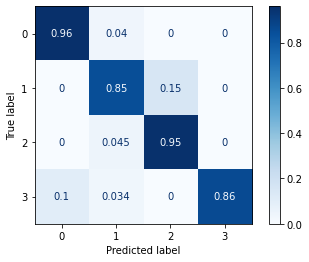

In [183]:
from sklearn.model_selection import GridSearchCV

X = df_train.drop('category',axis=1)
Y = df_train['category']

print("On ajoute Robust scaler sur nos features.")
transformer = RobustScaler().fit(X)
X = transformer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
parameters = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
lg = LogisticRegression()

clf = GridSearchCV(lg, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(str(X_test.shape[0]) + " points, dont " + str((y_test != y_pred).sum()) + ' mal classés')
print("Accuracy score :", accuracy_score(y_pred, y_test))
print("F1 score :", f1_score(y_pred, y_test, average='micro'))
disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')


print("Après plusieurs itérations de GridSearch sur du SVM, Random Forest et Regression logistic, utiliser toutes les colonnes scalé, sans PCA et avec une regréssion logistic semble offrir les meilleurs performances..")

## Prédire des valeurs pour le jeu de test 
Créer un fichier au format .csv contenant  vos prédictions.
En header le nom des colonnes (music_id et prediction) et pour chacun des morceaux la catégorie prédite.

Vérifier que votre notebook fonctionne avant de le rendre 

### Boite à outils  
exporter un dataFrame pandas au format csv :
`df_test.to_csv('data/test.csv' , sep=',', decimal='.')`

In [185]:
print("Predicting on df_test...")

print("On ajoute Robust scaler sur nos features.")
transformer = RobustScaler().fit(df_test)
features = transformer.transform(df_test)

print("Nombre de features à disposition :", len(df_test.columns), ".\n")

y_pred = clf.predict(df_test)

Predicting on df_test...
On ajoute Robust scaler sur nos features.
Nombre de features à disposition : 62 .



In [188]:
y_test_pred = pd.DataFrame(y_pred)
y_test_pred["music_id"] = df_test["music_id"]
y_test_pred.columns = ['prediction', 'music_id']
y_test_pred = y_test_pred.reindex(sorted(y_test_pred.columns), axis=1)

y_test_pred.to_csv('data/test.csv' , sep=',', decimal='.')